In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import cv2
import shutil
import seaborn as sns
#import glob

In [4]:
workdir =r'C:\Temp\Data\state-farm-distracted-driver-detection\\'

In [5]:
os.listdir(workdir)

['driver_imgs_list.csv', 'imgs', 'sample_submission.csv']

In [6]:
print(os.listdir(workdir+'imgs/'))
data_dir = workdir+'imgs/'

['test', 'train', 'val']


In [7]:

IMG_HEIGHT = 480
IMG_WIDTH = 640
EPOCHS = 4
BATCH_SIZE = 24

In [8]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,)

train_generator = datagen.flow_from_directory(
        data_dir+"train/",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_generator = datagen.flow_from_directory(
        data_dir+"train/",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 15702 images belonging to 10 classes.
Found 6722 images belonging to 10 classes.


In [9]:
total_train =15702 
total_val = 6722

In [10]:
model2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'), 
    Dense(10, activation='softmax')
])
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 480, 640, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 307200)            0

In [11]:
history = model2.fit_generator(
    train_generator,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=total_val // BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 654 steps, validate for 280 steps
Epoch 1/4
654/654 [==============================] - 147s 225ms/step - loss: 0.5510 - accuracy: 0.8621 - val_loss: 0.0433 - val_accuracy: 0.9905
Epoch 2/4
654/654 [==============================] - 142s 217ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0213 - val_accuracy: 0.9943
Epoch 3/4
654/654 [==============================] - 142s 218ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.0154 - val_accuracy: 0.9964
Epoch 4/4
654/654 [==============================] - 142s 217ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0164 - val_accuracy: 0.9963


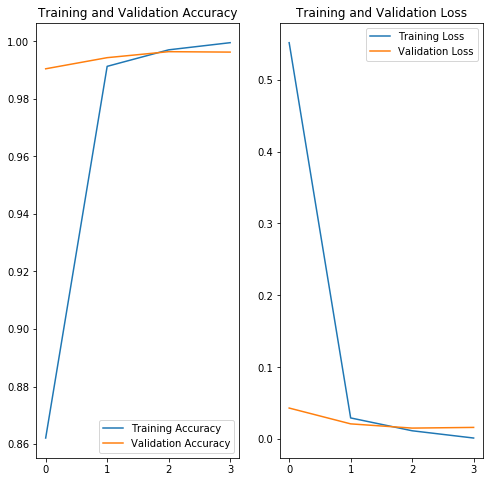

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Create the model 2 :  softmax activation and adam sgd

In [14]:
model21 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'), 
    Dense(10, activation='softmax')
])
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model21.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model21.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 480, 640, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 240, 320, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 307200)           

In [16]:
history = model21.fit_generator(
    train_generator,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=total_val // BATCH_SIZE
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 654 steps, validate for 280 steps
Epoch 1/4
654/654 [==============================] - 142s 217ms/step - loss: 0.8621 - accuracy: 0.7026 - val_loss: 0.1241 - val_accuracy: 0.9598
Epoch 2/4
654/654 [==============================] - 141s 216ms/step - loss: 0.0649 - accuracy: 0.9819 - val_loss: 0.0781 - val_accuracy: 0.9787
Epoch 3/4
654/654 [==============================] - 141s 216ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.0586 - val_accuracy: 0.9848
Epoch 4/4
654/654 [==============================] - 142s 218ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0305 - val_accuracy: 0.9932


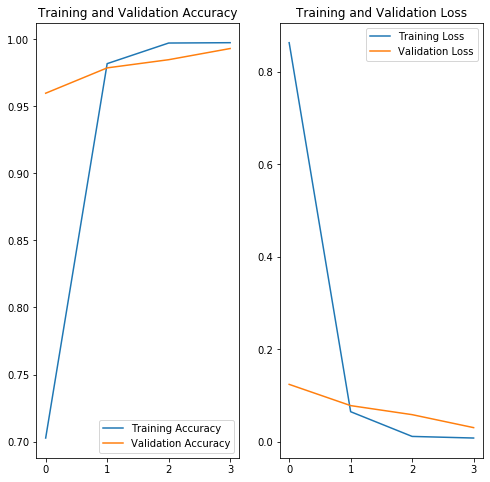

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Create the model 3: sigmoid activation and adam optimizer

In [10]:
def create_model(activation,optimizer):
  model = Sequential([
      Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
      MaxPooling2D(),
      Conv2D(32, 3, padding='same', activation='relu'),
      MaxPooling2D(),
      Conv2D(64, 3, padding='same', activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(512, activation='relu'), 
      Dense(10, activation=activation)
  ])
  model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [11]:
model3 = create_model('sigmoid','adam')

In [12]:
history = model3.fit_generator(
    train_generator,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=total_val // BATCH_SIZE)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 654 steps, validate for 280 steps
Epoch 1/4
654/654 [==============================] - 148s 227ms/step - loss: 0.4366 - accuracy: 0.8592 - val_loss: 0.0760 - val_accuracy: 0.9763
Epoch 2/4
654/654 [==============================] - 143s 218ms/step - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.1234 - val_accuracy: 0.9696
Epoch 3/4
654/654 [==============================] - 145s 222ms/step - loss: 0.0278 - accuracy: 0.9925 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 4/4
654/654 [==============================] - 147s 224ms/step - loss: 0.0276 - accuracy: 0.9930 - val_loss: 0.1275 - val_accuracy: 0.9646


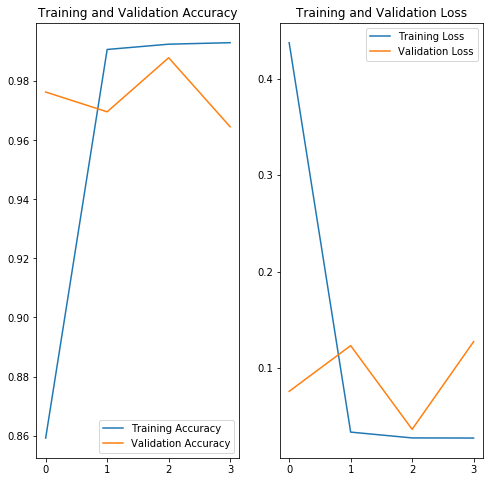

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Create the model 3: sigmoid activation and and SGD optimizer

In [14]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model31 = create_model('sigmoid', sgd)

In [15]:
history = model31.fit_generator(
    train_generator,
    steps_per_epoch=total_train // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=total_val // BATCH_SIZE)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 654 steps, validate for 280 steps
Epoch 1/4
654/654 [==============================] - 142s 217ms/step - loss: 0.8654 - accuracy: 0.7042 - val_loss: 0.0850 - val_accuracy: 0.9749
Epoch 2/4
654/654 [==============================] - 141s 216ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0584 - val_accuracy: 0.9844
Epoch 3/4
654/654 [==============================] - 136s 208ms/step - loss: 0.0226 - accuracy: 0.9945 - val_loss: 0.0521 - val_accuracy: 0.9860
Epoch 4/4
654/654 [==============================] - 141s 215ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0430 - val_accuracy: 0.9893


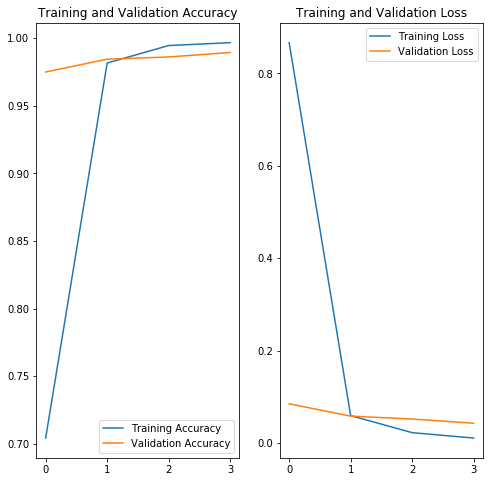

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## TEST model 2

In [18]:
def get_data(image_path):
    img = Image.open(image_path)
    img = img.resize(IMG_HEIGHT, IMG_WIDTH, Image.ANTIALIAS) # resizes image in-place
    return np.asarray(img)/255

In [19]:
test_file = pd.read_csv(workdir+'sample_submission.csv')
test_file.head(5)

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [20]:
%%time
for i, file in enumerate(test_file['img']):
  img_path = workdir+'/test/'+ file
  if os.path.exists(img_path):
    image = get_data(img_path)
    image = np.reshape(image, (1, image.shape[0], image.shape[1], image.shape[2]))
    result = model2.predict(image)
    test_file.iloc[i, 1:] = result[0]

Wall time: 2.21 s


In [21]:
test_file.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
